In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

In [3]:
def rho_red_light(x, rho_max):
    rho = rho_max * numpy.ones_like(x)
    mask = numpy.where(x < 3.0)
    rho[mask] = 0.5 * rho_max
    return rho

In [4]:
nx = 81
L = 4.0
dx = L / (nx - 1)
nt = 80
rho_max = 10.0
u_max = 1.0

x = numpy.linspace(0.0, L, num=nx)

rho0 = numpy.linspace(0.0, L, num=nx)

rho0 = rho_red_light(x, rho_max)

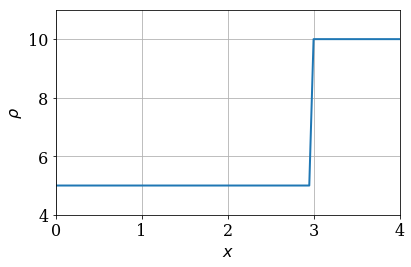

In [5]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(4.0, 11.0)
pyplot.tight_layout()

In [6]:
def update_plot(nt):
    fig = pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$\rho$')
    pyplot.grid()
    line = pyplot.plot(x, rho_hist1[nt],
                       color='C0', linestyle='-', linewidth=2)[0]
    pyplot.xlim(0.0, L)
    pyplot.ylim(4.0, 11.0)
    fig.tight_layout()
    fig.suptitle('Time step {:0>2}'.format(nt))

In [7]:
def flux(rho, u_max, rho_max):
    F = rho * u_max * (1.0 - rho / rho_max)
    return F

In [8]:
def lax_friedrichs(rho0, nt, dt, dx, bc_values, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho[1:-1] = (0.5 * (rho[:-2] + rho[2:]) -
                     dt / (2.0 * dx) * (F[2:] - F[:-2]))
        rho[0] = bc_values[0]
        rho[-1] = bc_values[1]
        rho_hist.append(rho.copy())
    return rho_hist

In [9]:
sigma = 1.0
dt = sigma * dx / u_max

rho_hist1 = lax_friedrichs(rho0, nt, dt, dx, (rho0[0], rho0[-1]),
                           u_max, rho_max)

In [10]:
import ipywidgets

nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                 description='time step')

w = ipywidgets.interactive(update_plot, nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=80), Output()), _dom_classes=('widget-in…

In [11]:
sigma = 0.5
dt = sigma * dx / u_max

rho_hist2 = lax_friedrichs(rho0, nt, dt, dx, (rho0[0], rho0[-1]),
                          u_max, rho_max)

In [12]:
def update_plot2(nt):
    fig = pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$\rho$')
    pyplot.grid()
    line = pyplot.plot(x, rho_hist2[nt],
                       color='C0', linestyle='-', linewidth=2)[0]
    pyplot.xlim(0.0, L)
    pyplot.ylim(4.0, 11.0)
    fig.tight_layout()
    fig.suptitle('Time step {:0>2}'.format(nt))

In [13]:
import ipywidgets

nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                 description='time step')

w = ipywidgets.interactive(update_plot2, nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=80), Output()), _dom_classes=('widget-in…

In [14]:
def jacobian(rho, u_max, rho_max):
    J = u_max * (1.0 - 2.0 * rho / rho_max)
    return J

In [15]:
def lax_wendroff(rho0, nt, dt, dx, bc_values, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        J = jacobian(rho, *args)
        rho[1:-1] = (rho[1:-1] -
                     dt / (2.0 * dx) * (F[2:] - F[:-2]) +
                     dt**2 / (4.0 * dx**2) *
                     ((J[1:-1] + J[2:]) * (F[2:] - F[1:-1]) -
                      (J[:-2] + J[1:-1]) * (F[1:-1] - F[:-2])))
        rho[0] = bc_values[0]
        rho[-1] = bc_values[1]
        rho_hist.append(rho.copy())
    return rho_hist

In [16]:
sigma = 1.0
dt = sigma * dx / u_max

rho_hist3 = lax_wendroff(rho0, nt, dt, dx, (rho0[0], rho0[-1]),
                        u_max, rho_max)

In [17]:
def update_plot3(nt):
    fig = pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$\rho$')
    pyplot.grid()
    line = pyplot.plot(x, rho_hist3[nt],
                       color='C0', linestyle='-', linewidth=2)[0]
    pyplot.xlim(0.0, L)
    pyplot.ylim(4.0, 11.0)
    fig.tight_layout()
    fig.suptitle('Time step {:0>2}'.format(nt))

In [18]:
import ipywidgets

nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                 description='time step')

w = ipywidgets.interactive(update_plot3, nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=80), Output()), _dom_classes=('widget-in…

In [19]:
sigma = 0.5
dt = sigma * dx / u_max

rho_hist4 = lax_wendroff(rho0, nt, dt, dx, (rho0[0], rho0[-1]),
                        u_max, rho_max)

In [20]:
def update_plot4(nt):
    fig = pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$\rho$')
    pyplot.grid()
    line = pyplot.plot(x, rho_hist4[nt],
                       color='C0', linestyle='-', linewidth=2)[0]
    pyplot.xlim(0.0, L)
    pyplot.ylim(4.0, 11.0)
    fig.tight_layout()
    fig.suptitle('Time step {:0>2}'.format(nt))

In [21]:
import ipywidgets

nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                 description='time step')

w = ipywidgets.interactive(update_plot4, nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=80), Output()), _dom_classes=('widget-in…

In [22]:
def maccormack(rho0, nt, dt, dx, bc_values, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    rho_star = rho.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho_star[1:-1] = (rho[1:-1] -
                          dt / dx * (F[2:] - F[1:-1]))
        F = flux(rho_star, *args)
        rho[1:-1] = 0.5 * (rho[1:-1] + rho_star[1:-1] -
                           dt / dx * (F[1:-1] - F[:-2]))
        rho[0] = bc_values[0]
        rho[-1] = bc_values[1]
        rho_hist.append(rho.copy())
    return rho_hist

In [23]:
sigma = 1.0
dt = sigma * dx / u_max

rho_hist5 = maccormack(rho0, nt, dt, dx, (rho0[0], rho0[-1]),
                      u_max, rho_max)

In [24]:
def update_plot5(nt):
    fig = pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$\rho$')
    pyplot.grid()
    line = pyplot.plot(x, rho_hist5[nt],
                       color='C0', linestyle='-', linewidth=2)[0]
    pyplot.xlim(0.0, L)
    pyplot.ylim(4.0, 11.0)
    fig.tight_layout()
    fig.suptitle('Time step {:0>2}'.format(nt))

In [25]:
import ipywidgets

nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                 description='time step')

w = ipywidgets.interactive(update_plot5, nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=80), Output()), _dom_classes=('widget-in…

In [26]:
sigma = 0.5
dt = sigma * dt / u_max

rho_hist6 = maccormack(rho0, nt, dt, dx, (rho0[0], rho0[-1]),
                      u_max, rho_max)

In [27]:
def update_plot6(nt):
    fig = pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$\rho$')
    pyplot.grid()
    line = pyplot.plot(x, rho_hist6[nt],
                       color='C0', linestyle='-', linewidth=2)[0]
    pyplot.xlim(0.0, L)
    pyplot.ylim(4.0, 11.0)
    fig.tight_layout()
    fig.suptitle('Time step {:0>2}'.format(nt))

In [28]:
import ipywidgets

nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                 description='time step')

w = ipywidgets.interactive(update_plot6, nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=80), Output()), _dom_classes=('widget-in…

In [29]:
def lax_friedrichs_forwardtimeforwardspace(rho0, nt, dt, dx, bc_values, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho[1:-1] = (0.5 * (rho[1:-1] + rho[2:]) -
                     dt / (2.0 * dx) * (F[2:] - F[1:-1]))
        rho[0] = bc_values[0]
        rho[-1] = bc_values[1]
        rho_hist.append(rho.copy())
    return rho_hist

In [30]:
sigma = 1.0
dt = sigma * dx / u_max

rho_hist7 = lax_friedrichs_forwardtimeforwardspace(rho0, nt, dt, dx, (rho0[0], rho0[-1]),
                                                  u_max, rho_max)

In [31]:
def update_plot7(nt):
    fig = pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$\rho$')
    pyplot.grid()
    line = pyplot.plot(x, rho_hist7[nt],
                       color='C0', linestyle='-', linewidth=2)[0]
    pyplot.xlim(0.0, L)
    pyplot.ylim(4.0, 11.0)
    fig.tight_layout()
    fig.suptitle('Time step {:0>2}'.format(nt))

In [32]:
import ipywidgets

nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                 description='time step')

w = ipywidgets.interactive(update_plot7, nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=80), Output()), _dom_classes=('widget-in…

In [33]:
sigma = 0.5
dt = sigma * dx / u_max

rho_hist8 = lax_friedrichs_forwardtimeforwardspace(rho0, nt, dt, dx, (rho0[0], rho0[-1]),
                                                  u_max, rho_max)

In [34]:
def update_plot8(nt):
    fig = pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$\rho$')
    pyplot.grid()
    line = pyplot.plot(x, rho_hist8[nt],
                       color='C0', linestyle='-', linewidth=2)[0]
    pyplot.xlim(0.0, L)
    pyplot.ylim(4.0, 11.0)
    fig.tight_layout()
    fig.suptitle('Time step {:0>2}'.format(nt))

In [35]:
import ipywidgets

nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                 description='time step')

w = ipywidgets.interactive(update_plot8, nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=80), Output()), _dom_classes=('widget-in…